In [1]:
import dabest
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 10, "lines.markersize": 30})

In [2]:
from scipy.stats import norm # Used in generation of populations.
import numpy as np # Used in generation of populations.

np.random.seed(9999) # Fix the seed so the results are replicable.
pop_size = 10000 # Size of each population.
Ns = 20 # The number of samples taken from each population

# Create populations
control_pop = norm.rvs(loc=3, scale=0.4, size=pop_size)
pop1 = norm.rvs(loc=3.5, scale=0.5, size=pop_size)
pop2 = norm.rvs(loc=2.5, scale=0.6, size=pop_size)
pop3 = norm.rvs(loc=3, scale=0.75, size=pop_size)
pop4 = norm.rvs(loc=3.5, scale=0.75, size=pop_size)
pop5 = norm.rvs(loc=3.25, scale=0.4, size=pop_size)


# Sample from the populations
choice_kwargs = dict(size=Ns, replace=False)

control = np.random.choice(control_pop, **choice_kwargs)
g1 = np.random.choice(pop1, **choice_kwargs)
g2 = np.random.choice(pop2, **choice_kwargs)
g3 = np.random.choice(pop3, **choice_kwargs)
g4 = np.random.choice(pop4, **choice_kwargs)
g5 = np.random.choice(pop5, **choice_kwargs)

# Add a `gender` column for coloring the data.
females = np.repeat('Female', Ns/2).tolist()
males = np.repeat('Male', Ns/2).tolist()
gender = females + males

# Combine samples and gender into a DataFrame.
df = pd.DataFrame({'Control': control,
                   'Group 1': g1,
                   'Group 2': g2,
                   'Group 3': g3,
                   'Group 4': g4,
                   'Group 5': g5,
                   'Gender' : gender,
                  })

In [3]:
df

,Control,Group 1,Group 2,Group 3,Group 4,Group 5,Gender
0,2.742313,3.737751,2.703766,3.933794,2.138557,2.997997,Female
1,2.681590,2.954575,3.158262,2.983600,3.377651,3.699350,Female
2,3.180724,2.531722,2.474184,2.286611,3.450214,2.507875,Female
3,1.961873,2.629912,2.431826,1.985591,3.565215,3.251389,Female
4,2.867556,3.335618,2.454033,3.887869,2.841621,3.513511,Female
5,3.090513,2.866635,2.424352,3.732885,3.687636,3.130434,Female
6,3.080017,4.515521,3.190292,2.958780,3.782352,3.049526,Female
7,2.920393,3.677249,1.707721,3.282976,3.797867,2.733923,Female
8,2.532780,3.782647,2.550367,4.047866,4.199612,4.292422,Female
9,2.797906,3.454759,2.171606,3.372171,2.794513,3.526129,Female


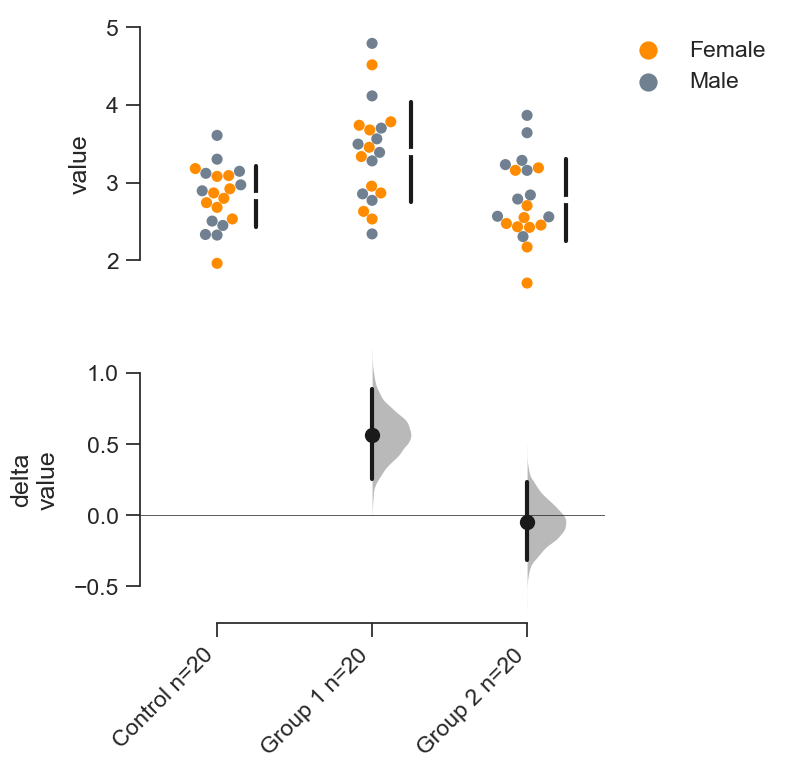

In [4]:
f14, results14 = dabest.plot(df, idx=('Control','Group 1','Group 2'),
                             color_col='Gender',
         
                             # assigned alphabetically according
                             # to the order of colors below.
                             custom_palette=['darkorange', 'slategrey']
                            )

In [5]:
data_path = '/Users/krista/Dropbox/loki_0/simple_rt_experiment_probabilityC/analysis/aggregated_data/'
ls_obs_data = pd.read_csv(data_path+"combined_learning_sig_obs_data.csv")

In [6]:
ls_obs_data.head()

,ID,experiment,condition,trial,shifted_epoch_trial,cp_with_slow_fast,obs_cp_with_slow_fast,p_id_accuracy,rt,lr_choice,...,cumulative_reward,iti,total_trial_time,epoch_n,epoch_trial,n_epoch_trials,prop_112,cpp,ideal_B,target_B
0,761,conflict,hc,0,0,1.0,0.0,1,0.711570,1.0,...,599.0,0.670199,2.385458,1.0,0,36,0.305556,0.099471,0.000000,0.000000
1,761,conflict,hc,1,1,0.0,1.0,0,0.681410,1.0,...,598.0,0.259707,1.939019,1.0,1,36,0.305556,0.035079,-1.241007,0.000000
2,761,conflict,hc,2,2,0.0,0.0,1,0.767118,0.0,...,599.0,0.740615,2.498060,1.0,2,36,0.305556,0.023075,-0.595781,-1.241007
3,761,conflict,hc,3,3,0.0,0.0,0,0.507209,1.0,...,598.0,0.250242,1.742433,1.0,3,36,0.305556,0.019881,-0.306135,-0.595781
4,761,conflict,hc,4,4,0.0,0.0,1,0.656259,1.0,...,599.0,0.700190,2.350417,1.0,4,36,0.305556,0.018539,-0.139394,-0.306135


In [7]:
ls_obs_data.loc[ls_obs_data.condition == 'hc', 'condition'] = 'high conflict'
ls_obs_data.loc[ls_obs_data.condition == 'lc', 'condition'] = 'low conflict'

ls_obs_data.loc[ls_obs_data.condition == 'lv', 'condition'] = 'low volatility'
ls_obs_data.loc[ls_obs_data.condition == 'hv', 'condition'] = 'high volatility'

In [8]:
grouped_df = ls_obs_data.groupby(['ID', 'condition'], as_index=False )[['p_id_accuracy', 'rt']].aggregate('mean')
grouped_df.head()


,ID,condition,p_id_accuracy,rt
0,761,high conflict,0.681667,0.339351
1,761,high volatility,0.773333,0.305525
2,761,low conflict,0.841667,0.295010
3,761,low volatility,0.860000,0.284506
4,762,high conflict,0.606667,0.388056


In [9]:
rt_df = grouped_df.copy()
rt_df=rt_df.drop('p_id_accuracy',axis=1)

In [66]:
acc_df = grouped_df.copy()
acc_df=acc_df.drop('rt',axis=1)

In [67]:
acc_df=acc_df.pivot(index='ID', columns='condition',)
acc_df = acc_df.rename_axis(None)
# acc_df.index.name = None
acc_df.columns.name = None
acc_df.columns = acc_df.columns.droplevel()

# acc_df.unstack().reset_index()
# acc_df.columns.name = None
acc_df.head()



condition,high conflict,high volatility,low conflict,low volatility
761,0.681667,0.773333,0.841667,0.860000
762,0.606667,0.696667,0.811667,0.680000
763,0.570000,0.501667,0.581667,0.518333
764,0.593333,0.516667,0.696667,0.631667
765,0.658333,0.710000,0.816667,0.726667


In [70]:
acc_df.reset_index()
acc_df['ID'] = acc_df.index

In [71]:
acc_df

condition,high conflict,high volatility,low conflict,low volatility,ID
761,0.681667,0.773333,0.841667,0.860000,761
762,0.606667,0.696667,0.811667,0.680000,762
763,0.570000,0.501667,0.581667,0.518333,763
764,0.593333,0.516667,0.696667,0.631667,764
765,0.658333,0.710000,0.816667,0.726667,765
766,0.613333,0.598333,0.826667,0.771667,766
767,0.533333,0.698333,0.890000,0.665000,767
768,0.505000,0.550000,0.506667,0.508333,768
769,0.631667,0.643333,0.731667,0.673333,769
770,0.540000,0.560000,0.801667,0.753333,770


In [ ]:
rt_df.columns = rt_df.columns.droplevel()
# acc_df.columns = acc_df.columns.droplevel()

In [ ]:
# rt_df=rt_df.reset_index(drop=True)
# acc_df=acc_df.reset_index(drop=True)

In [81]:
sns.set("notebook", font_scale=5, rc={'figure.figsize':(15,10), 'xtick.labelsize': 20, 'ytick.labelsize': 20, 'font.size': 15}, style='whitegrid')

In [82]:
n_boot=5000

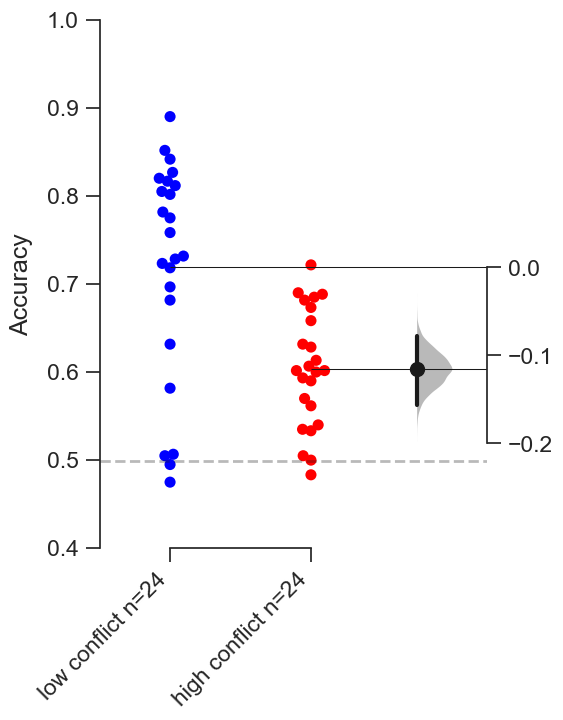

In [85]:
f_conf_acc, results_conf_acc = dabest.plot(data=acc_df, fig_size=(5,7),   
           idx=['low conflict', 'high conflict'],  n_boot=n_boot, paired=True, show_pairs=False,
            swarm_label='Accuracy',  swarm_ylim = (0.4, 1), custom_palette=['red','blue'], id_col='ID')
plt.axhline(linewidth=2, color='k', y = -0.22, ls='dashed', alpha=0.3)
plt.savefig('conflict_acc_estimation_plot.pdf', dpi=600, bbox_inches='tight', transparent=0)

In [ ]:
?dabest.plot()

In [ ]:
f_vol_acc, results_vol_acc = dabest.plot(data=acc_df, fig_size=(5,7),  
          idx=['low volatility', 'high volatility'], n_boot=n_boot, paired=True,show_pairs=False, 
            swarm_label='Accuracy', swarm_ylim = (0.4, 1), custom_palette=['purple','forestgreen'])
plt.axhline(linewidth=2, color='k', y = -0.175, ls='dashed', alpha=0.3)

plt.savefig('vol_acc_estimation_plot.png', dpi=600, bbox_inches='tight', transparent=0)

In [ ]:
f_vol_rt, results_vol_rt = dabest.plot(data=rt_df, fig_size=(5,7),   idx=('low volatility', 'high volatility'),
             n_boot=n_boot, paired=True,show_pairs=False, 
            swarm_label='Reaction Time (s)', swarm_ylim = (0.24, 0.5),  custom_palette=['purple', 'forestgreen'])
plt.savefig('vol_rt_estimation_plot.png', dpi=600, bbox_inches='tight', transparent=0)

In [ ]:
f_conf_rt, f_results_rt = dabest.plot(data=rt_df, fig_size=(5,7),  idx=['low conflict', 'high conflict'],
            custom_palette=['red', 'blue'] ,  n_boot=n_boot, paired=True,show_pairs=False, 
            swarm_label='Reaction Time (s)', swarm_ylim = (0.25, 0.5))

plt.savefig('conflict_rt_estimation_plot.png', dpi=600, bbox_inches='tight', transparent=0)

In [ ]:
##can't handle all the data.
# f_vol_acc, results_vol_acc = dabest.plot(data=ls_obs_data, fig_size=(5,7),  x='condition', y='rt', 
#             color_col='condition', idx=['lv', 'hv'], n_boot=0, paired=True,show_pairs=False, 
#             swarm_label='rt', swarm_ylim = (0.4, 1))
# plt.axhline(linewidth=2, color='k', y = -0.175, ls='dashed', alpha=0.3)

In [ ]:
sns.set(style="white", palette="muted", color_codes=True, context='talk') 
sns.set(font_scale=10)  

plt.figure(figsize=(30,30))
ax = sns.violinplot(x="rt", y="condition",
                    data=ls_obs_data[(ls_obs_data.condition == 'hc') | (ls_obs_data.condition == 'lc')], hue="p_id_accuracy", split=True,
                   scale="count", inner="quartile", dodge=True, order=['lc', 'hc'], hue_order=[0,1])


In [ ]:
sns.set(style="white", palette="muted", color_codes=True, context='poster') 
sns.set(font_scale=10)  

plt.figure(figsize=(30,30))
ax = sns.violinplot(x="rt", y="condition",
                    data=ls_obs_data[(ls_obs_data.condition == 'hv') | (ls_obs_data.condition == 'lv')], hue="p_id_accuracy", split=True,
                   scale="count", inner="quartile", dodge=True, order=['lv', 'hv'], hue_order=[0,1])


In [ ]:
#all conflict error data 
all_conflict_dist_err = sns.distplot(ls_obs_data.loc[((ls_obs_data.condition == 'lc' ) | (ls_obs_data.condition == 'hc')) & ls_obs_data.p_id_accuracy == 0, 'rt'], hist=False,
             color='b', kde_kws={"shade": True})
#high conflict error rts 
hc_dist_err = sns.distplot(ls_obs_data.loc[(ls_obs_data.condition == 'hc' ) & (ls_obs_data.p_id_accuracy == 0), 'rt'], hist=False,
             color='r', kde_kws={"shade": True})


plt.ylabel('Density')
plt.xlabel('Reaction Time (s)')
plt.tight_layout()
sns.despine(left=True)
plt.title('Conflict (Error Distributions)')
plt.show()


#all vol error data 
all_vol_dist_err = sns.distplot(ls_obs_data.loc[((ls_obs_data.condition == 'lv' ) | (ls_obs_data.condition == 'hv')) & (ls_obs_data.p_id_accuracy == 0), 'rt'], hist=False,
             color='b', kde_kws={"shade": True})
#high vol error rts 
hv_dist_err = sns.distplot(ls_obs_data.loc[(ls_obs_data.condition == 'hv' ) & (ls_obs_data.p_id_accuracy == 0), 'rt'], hist=False,
             color='r', kde_kws={"shade": True})

plt.ylabel('Density')
plt.xlabel('Reaction Time (s)')
plt.tight_layout()
sns.despine(left=True)
plt.title('Volatility (Error Distributions)')
plt.show()

In [ ]:
#all conflict correct data 
all_conflict_dist_err = sns.distplot(ls_obs_data.loc[((ls_obs_data.condition == 'lc' ) | (ls_obs_data.condition == 'hc')) & (ls_obs_data.p_id_accuracy == 1), 'rt'], hist=False,
             color='b', kde_kws={"shade": True})
#high conflict correct rts 
hc_dist_err = sns.distplot(ls_obs_data.loc[(ls_obs_data.condition == 'hc' ) & (ls_obs_data.p_id_accuracy == 1), 'rt'], hist=False,
             color='r', kde_kws={"shade": True})


plt.ylabel('Density')
plt.xlabel('Reaction Time (s)')
plt.tight_layout()
sns.despine(left=True)
plt.title('Conflict (Correct Distributions)')
plt.show()


#all vol correct data 
all_vol_dist_err = sns.distplot(ls_obs_data.loc[((ls_obs_data.condition == 'lv' ) | (ls_obs_data.condition == 'hv')) & ls_obs_data.p_id_accuracy == 1, 'rt'], hist=False,
             color='b', kde_kws={"shade": True})
#high vol correct rts 
hv_dist_err = sns.distplot(ls_obs_data.loc[(ls_obs_data.condition == 'hv' ) & (ls_obs_data.p_id_accuracy == 1), 'rt'], hist=False,
             color='r', kde_kws={"shade": True})

plt.ylabel('Density')
plt.xlabel('Reaction Time (s)')
plt.tight_layout()
sns.despine(left=True)
plt.title('Volatility (Correct Distributions)')
plt.show()

In [ ]:
b_plt=sns.barplot(x="condition",y="ideal_B", data=learning_signals_sorted, ci=95, n_boot=1000, units='ID', order=['lc', 'hc', 'lv', 'hv'], errwidth=4, palette=clrs)
b_plt.set_xticklabels(['Low Conflict', 'High Conflict', 'Low Volatility', 'High Volatility'], rotation=0)
b_plt.set_xlabel('')
sns.despine()
plt.ylim([0,1.2])

In [ ]:
from scipy import stats

In [ ]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 10, "lines.markersize": 30})
clrs = ['blue', 'red', 'forestgreen', 'purple']

plt.figure(figsize=(20,8))

sns.set(font_scale=3,style='whitegrid')
acc_plt=sns.pointplot(x="condition",y="p_id_accuracy",data=ls_obs_data,palette=hex_clrs_err, dodge=True, units='ID', n_boot=1000, order=['lc', 'hc', 'lv', 'hv'], errwidth=3, ci=95, scale=3) 

acc_plt=sns.barplot(x="condition",y="p_id_accuracy",data=ls_obs_data,palette=hex_clrs_mean, dodge=True, units='ID', n_boot=1000, order=['lc', 'hc', 'lv', 'hv'],ci=0.95, estimator = np.mean, kind="point", scale=3, errwidth=0) 
# acc_plt=sns.pointplot(x="condition",y="p_id_accuracy",data=ls_obs_data,palette=hex_clrs_err, dodge=True, units='ID', n_boot=1000, order=['lc', 'hc', 'lv', 'hv'], ci=0.95, estimator = np.mean, kind="point", scale=2.7, errwidth=2) 
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 10, "lines.markersize": 30})
clrs = ['blue', 'red', 'forestgreen', 'purple']


In [ ]:
clrs


In [ ]:


plt.figure(figsize=(6,3))

sns.set(font_scale=1.2,style='whitegrid')
# acc_plt=sns.barplot(x="condition",y="p_id_accuracy",data=ls_obs_data,palette=hex_clrs_err,  units='ID', n_boot=1000, order=['lc', 'hc', 'lv', 'hv'], errwidth=3, ci=95) 

acc_plt = sns.barplot(x="condition",y="p_id_accuracy",data=ls_obs_data,palette=clrs,  units='ID', n_boot=1000,order=['lc', 'hc', 'lv', 'hv'],ci=95, errwidth=4)
# acc_plt=sns.pointplot(x="condition",y="p_id_accuracy",data=ls_obs_data,palette=hex_clrs_mean,  units='ID', n_boot=1000, order=['lc', 'hc', 'lv', 'hv'],ci=0.95, estimator = np.mean, kind="point", scale=3, errwidth=0) 
# acc_plt=sns.pointplot(x="condition",y="p_id_accuracy",data=ls_obs_data,palette=hex_clrs_err, dodge=True, units='ID', n_boot=1000, order=['lc', 'hc', 'lv', 'hv'], ci=0.95, estimator = np.mean, kind="point", scale=2.7, errwidth=2) 

acc_plt.set_xticklabels(['Low Conflict', 'High Conflict', 'Low Volatility', 'High Volatility'], rotation=0)
acc_plt.set_xlabel('')
sns.despine()
acc_plt.set_ylabel('Accuracy',labelpad=10)

# errors = (ls_obs_data.groupby(['condition']).std()['p_id_accuracy']*1.96) / np.sqrt(24)
# acc_plt.errorbar(x_coords, y_coords, yerr=errors,
#     ecolor=hex_clrs_err, fmt=' ', zorder=-1, elinewidth=3)

# acc_plt.set_yticks(np.arange(0, 1, .05))
# plt.ylim([0.5,0.8])
# plt.savefig('acc_point.pdf', dpi=600)
acc_plt.set_xticklabels(['Low Conflict', 'High Conflict', 'Low Volatility', 'High Volatility'], rotation=0)
acc_plt.set_xlabel('')
sns.despine()
acc_plt.set_ylabel('Accuracy',labelpad=6)

# errors = (ls_obs_data.groupby(['condition']).std()['p_id_accuracy']*1.96) / np.sqrt(24)
# acc_plt.errorbar(x_coords, y_coords, yerr=errors,
#     ecolor=hex_clrs_err, fmt=' ', zorder=-1, elinewidth=3)

# acc_plt.set_yticks(np.arange(0, 1, .05))
# plt.ylim([0.5,0.8])
# acc_plt.set_yticks(np.arange(0, 0.8, .1))

acc_plt.set_yticks(np.arange(0, 1, .05))
plt.ylim([0.5,0.8])

plt.savefig('acc_point.pdf', dpi=600)

In [ ]:


plt.figure(figsize=(6,3))

sns.set(font_scale=1.2,style='whitegrid')
# acc_plt=sns.barplot(x="condition",y="p_id_accuracy",data=ls_obs_data,palette=hex_clrs_err,  units='ID', n_boot=1000, order=['lc', 'hc', 'lv', 'hv'], errwidth=3, ci=95) 

acc_plt = sns.barplot(x="condition",y="rt",data=ls_obs_data,palette=clrs,  units='ID', n_boot=1000,order=['lc', 'hc', 'lv', 'hv'],ci=95, errwidth=4)
# acc_plt=sns.pointplot(x="condition",y="p_id_accuracy",data=ls_obs_data,palette=hex_clrs_mean,  units='ID', n_boot=1000, order=['lc', 'hc', 'lv', 'hv'],ci=0.95, estimator = np.mean, kind="point", scale=3, errwidth=0) 
# acc_plt=sns.pointplot(x="condition",y="p_id_accuracy",data=ls_obs_data,palette=hex_clrs_err, dodge=True, units='ID', n_boot=1000, order=['lc', 'hc', 'lv', 'hv'], ci=0.95, estimator = np.mean, kind="point", scale=2.7, errwidth=2) 

acc_plt.set_xticklabels(['Low Conflict', 'High Conflict', 'Low Volatility', 'High Volatility'], rotation=0)
acc_plt.set_xlabel('')
sns.despine()
acc_plt.set_ylabel('Reaction Time (s)',labelpad=6)

# errors = (ls_obs_data.groupby(['condition']).std()['p_id_accuracy']*1.96) / np.sqrt(24)
# acc_plt.errorbar(x_coords, y_coords, yerr=errors,
#     ecolor=hex_clrs_err, fmt=' ', zorder=-1, elinewidth=3)

# acc_plt.set_yticks(np.arange(0, 1, .05))
# plt.ylim([0.5,0.8])
# plt.savefig('acc_point.pdf', dpi=600)
# acc_plt.set_xticklabels(['Low Conflict', 'High Conflict', 'Low Volatility', 'High Volatility'], rotation=0)
# acc_plt.set_xlabel('')
# sns.despine()
# acc_plt.set_ylabel('Accuracy',labelpad=6)

# errors = (ls_obs_data.groupby(['condition']).std()['p_id_accuracy']*1.96) / np.sqrt(24)
# acc_plt.errorbar(x_coords, y_coords, yerr=errors,
#     ecolor=hex_clrs_err, fmt=' ', zorder=-1, elinewidth=3)

# acc_plt.set_yticks(np.arange(0, 1, .05))
# plt.ylim([0.5,0.8])
# acc_plt.set_yticks(np.arange(0, .36, .1))
# plt.ylim([0.5,0.8])
# plt.ylim([0,0.36])
# acc_plt.set_ylim([0.31,0.36])
plt.ylim([0.31,0.36])


plt.savefig('rt_bar.pdf', dpi=600)

In [ ]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 10, "lines.markersize": 30})
clrs = ['blue', 'red', 'forestgreen', 'purple']

plt.figure(figsize=(20,8))

sns.set(font_scale=3,style='whitegrid')
acc_plt=sns.pointplot(x="condition",y="p_id_accuracy",data=ls_obs_data,palette=hex_clrs_err, dodge=True, units='ID', n_boot=1000, order=['lc', 'hc', 'lv', 'hv'], errwidth=3, ci=95, scale=3) 

acc_plt=sns.pointplot(x="condition",y="p_id_accuracy",data=ls_obs_data,palette=hex_clrs_mean, dodge=True, units='ID', n_boot=1000, order=['lc', 'hc', 'lv', 'hv'],ci=0.95, estimator = np.mean, kind="point", scale=3, errwidth=0) 
# acc_plt=sns.pointplot(x="condition",y="p_id_accuracy",data=ls_obs_data,palette=hex_clrs_err, dodge=True, units='ID', n_boot=1000, order=['lc', 'hc', 'lv', 'hv'], ci=0.95, estimator = np.mean, kind="point", scale=2.7, errwidth=2) 

acc_plt.set_xticklabels(['Low Conflict', 'High Conflict', 'Low Volatility', 'High Volatility'], rotation=0)
acc_plt.set_xlabel('')
sns.despine()
acc_plt.set_ylabel('Accuracy',labelpad=18)

# errors = (ls_obs_data.groupby(['condition']).std()['p_id_accuracy']*1.96) / np.sqrt(24)
# acc_plt.errorbar(x_coords, y_coords, yerr=errors,
#     ecolor=hex_clrs_err, fmt=' ', zorder=-1, elinewidth=3)

# acc_plt.set_yticks(np.arange(0, 1, .05))
# plt.ylim([0.5,0.8])
# plt.savefig('acc_point.pdf', dpi=600)

In [ ]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 10, "lines.markersize": 30})
clrs = ['blue', 'red', 'forestgreen', 'purple']

plt.figure(figsize=(20,8))
sns.set( font_scale=3,style='whitegrid')
rt_plt=sns.pointplot(x="condition",y="rt",data=ls_obs_data,palette=clrs, dodge=True, units='ID', n_boot=1000, order=['lc', 'hc', 'lv', 'hv'], errwidth=4, ci=95)
rt_plt.set_xticklabels(['Low Conflict', 'High Conflict', 'Low Volatility', 'High Volatility'], rotation=0)
rt_plt.set_xlabel('')
rt_plt.set_xlabel('')
rt_plt.set_ylabel('Reaction Time (s)', labelpad=18)
sns.despine()
# plt.ylim([0,1.2])
acc_plt.set_yticks(np.arange(0, .36, .1))

plt.ylim([0.31,0.36])
plt.savefig('rt_point.pdf', dpi=600)

In [ ]:
import numpy as np

In [ ]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 10, "lines.markersize": 30})
clrs = ['blue', 'red', 'forestgreen', 'purple']

plt.figure(figsize=(20,8))
sns.set( font_scale=3,style='whitegrid')
acc_plt=sns.pointplot(x="condition",y="ideal_B",data=ls_obs_data,palette=clrs, dodge=True, units='ID', n_boot=1000, order=['lc', 'hc', 'lv', 'hv'], errwidth=4, ci=95)
acc_plt.set_xticklabels(['Low Conflict', 'High Conflict', 'Low Volatility', 'High Volatility'], rotation=0)
acc_plt.set_xlabel('')
sns.despine()
acc_plt.set_ylabel('$\Delta B$',labelpad=18)
acc_plt.set_yticks(np.arange(0, 1.5, .2))

plt.ylim([0.4,1.2])
plt.savefig('B.pdf', dpi=600)

In [ ]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 10, "lines.markersize": 30})
clrs = ['blue', 'red', 'forestgreen', 'purple']
hex_clrs_mean = ['#2364cc', '#e03963', '#80b622', '#833595']
hex_clrs_err = ['#8caee4', '#fd82b3', '#9fd786', '#b889d7']

# Low Conflict mean: #2364cc
# Low Conflict error: #8caee4

# High Conflict mean: #e03963
# High Conflict error: #fd82b3

# Low Volatility mean: '#80b622'
# Low Volatility error: #9fd786

# High Volatility mean: '#833595'
# High Volatility error: #b889d7



plt.figure(figsize=(20,8))
sns.set( font_scale=3,style='whitegrid')
acc_plt=sns.pointplot(x="condition",y="cpp",data=ls_obs_data,palette=hex_clrs_mean, dodge=True, units='ID', n_boot=1000, order=['lc', 'hc', 'lv', 'hv'], errwidth=3, ci=95, scale = 3)
acc_plt.set_xticklabels(['Low Conflict', 'High Conflict', 'Low Volatility', 'High Volatility'], rotation=0)
acc_plt.set_xlabel('')
sns.despine()
acc_plt.set_ylabel('$\Omega$',labelpad=18)

# plt.ylim([0,1.2])
# plt.savefig('cpp.pdf', dpi=600)

In [ ]:
vol_rt_diff = ls_obs_data.rt[ls_obs_data.condition == 'hv'].values-ls_obs_data.rt[ls_obs_data.condition == 'lv'].values

In [ ]:
conflict_rt_diff = ls_obs_data.rt[ls_obs_data.condition == 'hc'].values-ls_obs_data.rt[ls_obs_data.condition == 'lc'].values

In [ ]:
x=ls_obs_data.groupby(['ID', 'condition'])

In [ ]:
lv_data = ls_obs_data.loc[ls_obs_data.condition == 'lv', ['rt', 'ID', 'condition']]
hv_data = ls_obs_data.loc[ls_obs_data.condition == 'hv', ['rt', 'ID', 'condition']]

In [ ]:
lv_data_acc= ls_obs_data.loc[ls_obs_data.condition == 'lv', ['p_id_accuracy', 'ID', 'condition']]
hv_data_acc = ls_obs_data.loc[ls_obs_data.condition == 'hv', ['p_id_accuracy', 'ID', 'condition']]

In [ ]:
rt_lv=lv_data.groupby(['ID']).mean().values
rt_hv=hv_data.groupby(['ID']).mean().values

In [ ]:
acc_lv=lv_data_acc.groupby(['ID']).mean().values
acc_hv=hv_data_acc.groupby(['ID']).mean().values

In [ ]:
vol_rt_diff = rt_hv - rt_lv
vol_acc_diff = acc_lv - acc_hv

In [ ]:
vol_rt_diff_flat=vol_rt_diff.flatten()
vol_rt_diff_flat.mean()

vol_acc_diff_flat = vol_acc_diff.flatten()

In [ ]:
sum(vol_acc_diff_flat < 0)/vol_acc_diff.shape[0]

In [ ]:
np.where(vol_acc_diff_flat < 0 )

In [ ]:
vol_acc_diff

In [ ]:
sns.kdeplot(vol_acc_diff_flat)

In [ ]:
sns.kdeplot(vol_rt_diff_flat)

In [ ]:
vol_rt_diff.mean()
sns.kdeplot(vol_rt_diff)

In [ ]:
from scipy.stats import norm
d1 = norm.rvs(size=1000,loc=17,scale=2.5)
d2 = norm.rvs(size=1000,loc=9,scale=2.5)

In [ ]:
sns.kdeplot(d1,shade=True, color='blue', alpha=0.1)
sns.kdeplot(d2,shade=True,  color='green', alpha=0.1)
sns.kdeplot(d2_diff, color='r', shade=True,alpha=.7)

In [ ]:
d2_diff.mean(), d2_diff.std()

In [ ]:
d2_diff = d1 - d2

In [ ]:
sns.kdeplot(d2_diff)